<a href="https://colab.research.google.com/github/Malanidhruv/Python-projects/blob/main/NIFTY_FMCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pya3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pya3 import Aliceblue
from datetime import datetime, timedelta
import holidays


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "NSE.csv" /content/drive/MyDrive/

In [5]:
!cp "Nifty FMCG Historical Data.csv" /content/drive/MyDrive/


In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Nifty FMCG Historical Data.csv')
# Load the CSV file into a DataFrame
df1 = pd.read_csv('NSE.csv')

# Display the first few rows of the DataFrame to ensure it was loaded correctly
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,17-09-2024,"64,719.30","64,640.40","65,197.90","64,610.35",18.30M,0.19%
1,16-09-2024,"64,597.00","64,998.50","64,998.50","64,357.75",26.15M,-0.72%
2,13-09-2024,"65,062.80","65,616.25","65,616.25","64,912.05",28.88M,-0.69%
3,12-09-2024,"65,513.20","64,958.65","65,597.85","64,697.70",41.17M,1.15%
4,11-09-2024,"64,768.15","64,654.00","65,344.60","64,481.60",33.96M,0.28%


In [8]:
import pandas as pd

# Load the CSV file with dayfirst=True
file_path = '/content/Nifty FMCG Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True, thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [9]:
import pandas as pd

# Load the CSV file without parsing dates initially
file_path = '/content/Nifty FMCG Historical Data.csv'
df = pd.read_csv(file_path, thousands=',', converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Manually parsing
df.set_index('Date', inplace=True)


In [10]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty FMCG Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Rename 'Change %' to 'pct'
df.rename(columns={'Change %': 'pct'}, inplace=True)

# Verify column names and data
print(df.columns)
print(df.head())

# Resample data to get monthly percentage change (sum of daily percentage changes in a month)
monthly_pct_change = df['pct'].resample('M').sum()

# Convert the result to a DataFrame for further manipulation
monthly_df = monthly_pct_change.to_frame(name='pct')

# Extract year and month for grouping purposes
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month

# Calculate the average monthly returns and standard deviation
monthly_avg = monthly_df.groupby('month')['pct'].mean()
monthly_std = monthly_df.groupby('month')['pct'].std()

# Combine into a single DataFrame and sort by 'Average Return'
monthly_stats = pd.DataFrame({
    'Average Return': monthly_avg,
    'Standard Deviation': monthly_std
}).sort_values(by='Average Return', ascending=False)

# Display the result
print(monthly_stats)


<ipython-input-10-c005cbd159c8>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'pct'], dtype='object')
               Price      Open      High       Low    Vol.     pct
Date                                                              
2024-09-17  64719.30  64640.40  65197.90  64610.35  18.30M  0.0019
2024-09-16  64597.00  64998.50  64998.50  64357.75  26.15M -0.0072
2024-09-13  65062.80  65616.25  65616.25  64912.05  28.88M -0.0069
2024-09-12  65513.20  64958.65  65597.85  64697.70  41.17M  0.0115
2024-09-11  64768.15  64654.00  65344.60  64481.60  33.96M  0.0028
       Average Return  Standard Deviation
month                                    
7            0.034243            0.043232
3            0.029686            0.045922
4            0.026736            0.043010
5            0.024557            0.032968
6            0.018643            0.037339
12           0.010954            0.034036
11           0.009938            0.043030
8            0.009707            0.043771
10           0.004015            0.03518

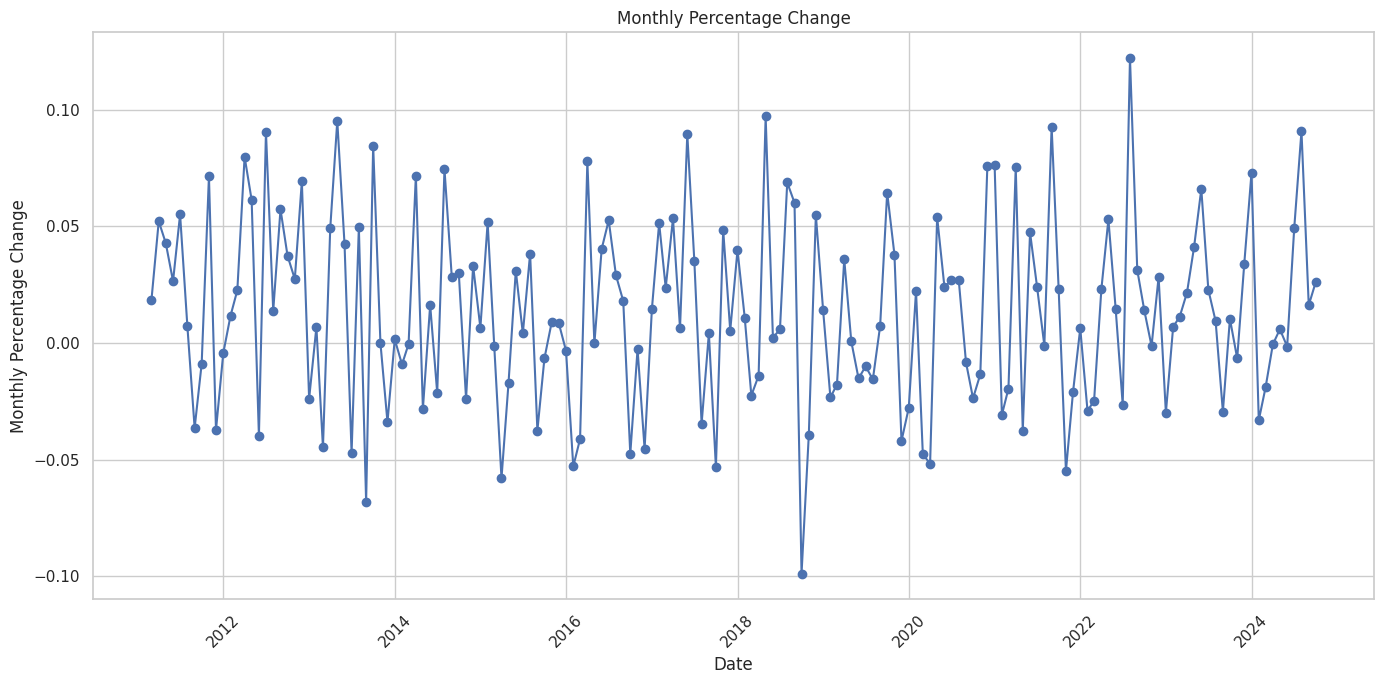

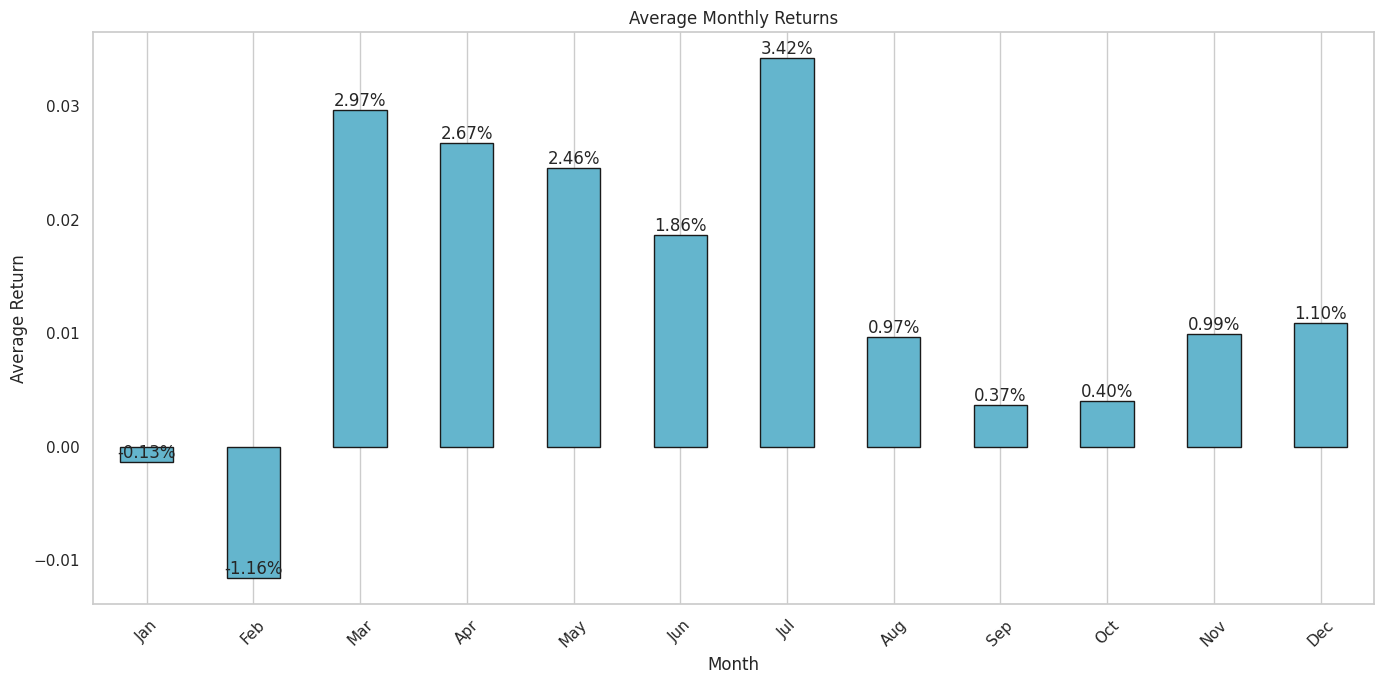

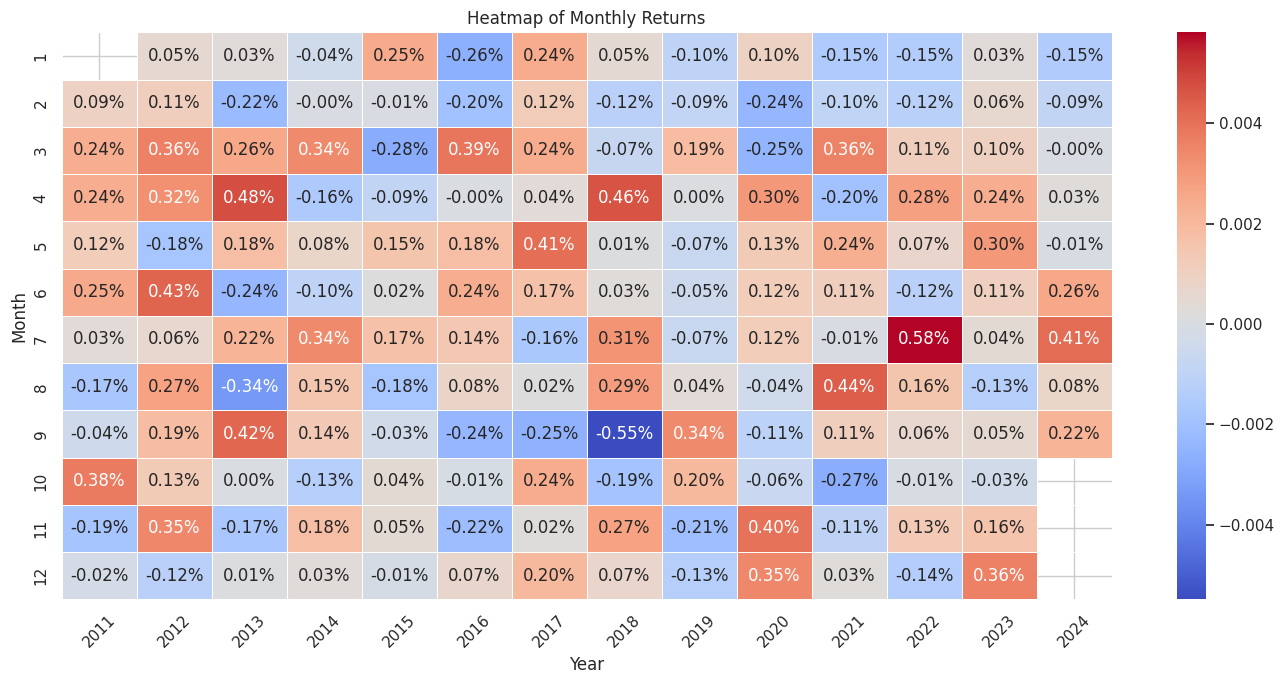

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Line Plot of Monthly Percentage Change
plt.figure(figsize=(14, 7))
plt.plot(monthly_df.index, monthly_df['pct'], marker='o', linestyle='-', color='b')
plt.title('Monthly Percentage Change')
plt.xlabel('Date')
plt.ylabel('Monthly Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar Plot of Average Monthly Returns with Annotations
plt.figure(figsize=(14, 7))
bars = monthly_avg.plot(kind='bar', color='c', edgecolor='k')

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2%}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom')

plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Heatmap of Monthly Returns
# Resample data to get monthly returns (mean of daily percentage changes)
monthly_returns = df['pct'].resample('M').mean()
monthly_returns = monthly_returns.reset_index()

# Add year and month columns
monthly_returns['Year'] = monthly_returns['Date'].dt.year
monthly_returns['Month'] = monthly_returns['Date'].dt.month

# Pivot table to get a matrix format for the heatmap
heatmap_data = monthly_returns.pivot(index='Month', columns='Year', values='pct')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2%", linewidths=0.5)
plt.title('Heatmap of Monthly Returns')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2009, 1, 1)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks with April in Top 3 Months of Highest Average Return:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        18921, 547, 10990, 17963, 10447, 1394, 772, 2535, 3432, 10099, 16713, 341, 15141, 4067, 1660
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months
        top_months = monthly_stats.head(3)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        if 7 in top_months.index:  # Check if July (7) is one of the top 3 months
            stock_name = get_stock_name(alice, token)
            top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: Mb8UdbbQsBujSKlCjc3hlq97P6dx19xeSqQxTKIetKDZN6miJtnkN95Np8nsJ80TGZlIrINv5MOV2LlzOGL70WP1OjWRqnHseH5BmZbUpn7BXin7gjY2jUvRHXBpZUmv

Stocks with April in Top 3 Months of Highest Average Return:

BRITANNIA-EQ:
May: 5.63%
July: 4.21%
April: 3.89%

RADICO-EQ:
October: 9.51%
August: 6.74%
July: 4.10%

NESTLEIND-EQ:
October: 4.25%
March: 3.82%
July: 2.79%

MCDOWELL-N-EQ:
October: 5.37%
July: 4.94%
November: 4.15%

HINDUNILVR-EQ:
June: 4.82%
May: 3.05%
July: 2.94%

DABUR-EQ:
July: 4.72%
June: 4.05%
April: 3.86%

PGHH-EQ:
September: 4.06%
February: 3.77%
July: 3.35%

TATACONSUM-EQ:
April: 7.82%
August: 6.90%
July: 6.62%

GODREJCP-EQ:
May: 9.16%
July: 5.19%
March: 3.44%

UBL-EQ:
December: 6.32%
July: 5.89%
April: 4.18%

BALRAMCHIN-EQ:
October: 6.34%
July: 5.22%
April: 4.48%

COLPAL-EQ:
April: 4.88%
June: 3.78%
July: 3.66%

MARICO-EQ:
May: 6.21%
July: 5.53%
April: 3.64%

ITC-EQ:
March: 4.66%
July: 3.01%
April: 2.78%

Data saved to top_stocks.csv


In [14]:
# MONTHLY data of average returns

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2009, 1, 1)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks return on monthly basis:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        18921, 547, 10990, 17963, 10447, 1394, 772, 2535, 3432, 10099, 16713, 341, 15141, 4067, 1660
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months based on average returns
        top_months = monthly_stats.head(12)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        # Add the stock to the list regardless of specific months
        stock_name = get_stock_name(alice, token)
        top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: Mb8UdbbQsBujSKlCjc3hlq97P6dx19xeSqQxTKIetKDZN6miJtnkN95Np8nsJ80TGZlIrINv5MOV2LlzOGL70WP1OjWRqnHseH5BmZbUpn7BXin7gjY2jUvRHXBpZUmv

Stocks return on monthly basis:

VBL-EQ:
November: 10.41%
April: 8.23%
August: 6.93%
February: 5.21%
May: 5.20%
December: 4.48%
January: 1.92%
September: -0.67%
October: -0.77%
July: -2.71%
March: -3.67%
June: -9.13%

BRITANNIA-EQ:
May: 5.63%
July: 4.21%
April: 3.89%
June: 3.49%
August: 2.59%
March: 1.71%
October: 1.64%
December: 1.43%
February: 0.55%
January: -0.76%
November: -2.38%
September: -3.91%

RADICO-EQ:
October: 9.51%
August: 6.74%
July: 4.10%
November: 3.65%
January: 3.39%
December: 1.61%
March: 1.43%
September: 1.34%
June: 0.94%
May: 0.84%
April: -1.17%
February: -3.53%

NESTLEIND-EQ:
October: 4.25%
March: 3.82%
July: 2.79%
April: 2.76%
August: 2.29%
December: 2.11%
May: 1.87%
June: 0.82%
September: 0.28%
February: -0.04%
November: -0.30%
January: -8.21%

MCDOWELL-N-EQ:
October: 5.37%
July: 4.94%
No

In [15]:
data = {
    'Stock': ['VBL-EQ', 'BRITANNIA-EQ', 'RADICO-EQ', 'NESTLEIND-EQ', 'MCDOWELL-N-EQ',
              'HINDUNILVR-EQ', 'DABUR-EQ', 'PGHH-EQ', 'TATACONSUM-EQ', 'GODREJCP-EQ',
              'UBL-EQ', 'BALRAMCHIN-EQ', 'COLPAL-EQ', 'MARICO-EQ', 'ITC-EQ'],
    'January': [1.92, -0.76, 3.39, -8.21, -3.14, -1.69, -0.21, -2.37, -2.17, -1.36, -0.87, 1.80, -2.54, -0.25, 0.91],
    'February': [5.21, 0.55, -3.53, -0.04, 1.20, -1.61, 0.57, 3.77, 1.55, -1.00, -1.30, -0.58, 0.02, -0.22, -1.97],
    'March': [-3.67, 1.71, 1.43, 3.82, -1.14, 2.55, 0.56, 3.02, -1.46, 3.44, 2.07, 1.51, 2.41, 3.12, 4.66],
    'April': [8.23, 3.89, -1.17, 2.76, 3.27, 2.00, 3.86, 1.35, 7.82, 1.67, 4.18, 4.48, 4.88, 3.64, 2.78],
    'May': [5.20, 5.63, 0.84, 1.87, 3.76, 3.05, 2.85, 0.83, -0.67, 9.16, 1.86, 0.85, 1.10, 6.21, 2.37],
    'June': [-9.13, 3.49, 0.94, 0.82, -3.57, 4.82, 4.05, 2.62, 4.60, 0.52, 1.03, 3.89, 3.78, 2.43, 1.10],
    'July': [-2.71, 4.21, 4.10, 2.79, 4.94, 2.94, 4.72, 3.35, 6.62, 5.19, 5.89, 5.22, 3.66, 5.53, 3.01],
    'August': [6.93, 2.59, 6.74, 2.29, 0.80, 2.35, 1.35, 1.24, 6.90, 3.16, 2.89, -0.34, -0.46, -0.22, -3.57],
    'September': [-0.67, -3.91, 1.34, 0.28, 0.87, 0.87, -2.88, 4.06, -1.51, -2.31, 2.38, 1.86, -0.40, 0.66, 1.17],
    'October': [-0.77, 1.64, 9.51, 4.25, 5.37, 0.37, -0.06, 0.46, -0.61, 1.32, 3.27, 6.34, 1.84, 0.64, 0.20],
    'November': [10.41, -2.38, 3.65, -0.30, 4.15, 1.65, 0.68, 1.13, 3.99, 0.23, 0.62, 1.51, 1.34, 0.66, 1.88],
    'December': [4.48, 1.43, 1.61, 2.11, -1.31, 0.98, 1.61, 2.68, 3.36, 1.33, 6.32, -1.45, 2.20, -2.26, 0.46]
}


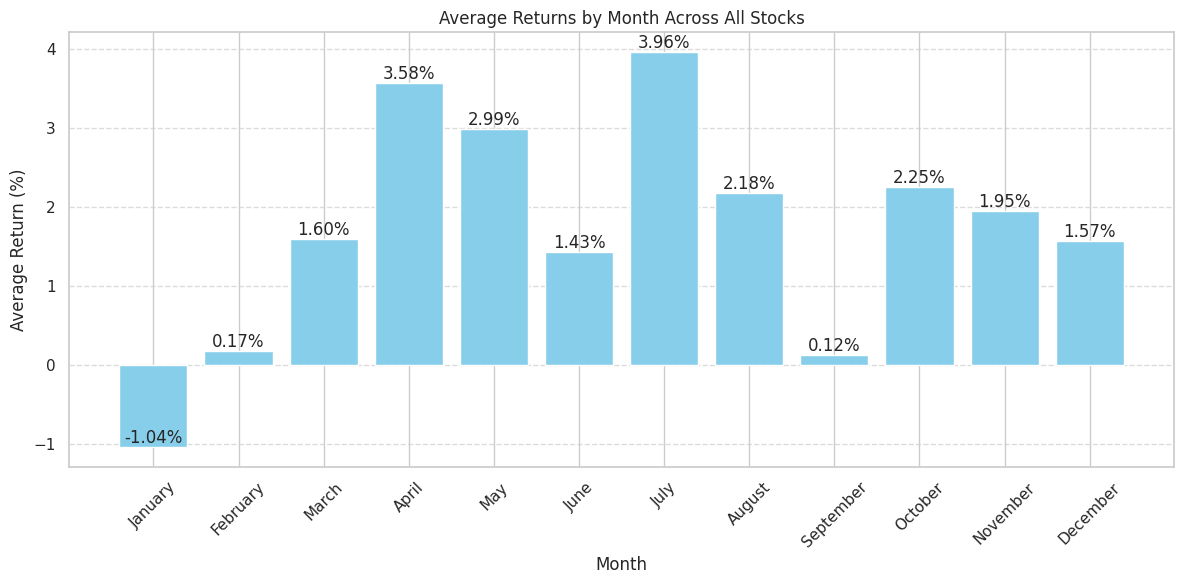

In [16]:
import pandas as pd
import matplotlib.pyplot as plt





# Convert to DataFrame
df = pd.DataFrame(data)

# Set the month as the index
df = df.set_index('Stock')

# Calculate the average return for each month across all stocks
monthly_avg_returns = df.mean()

# Create a DataFrame for plotting
monthly_avg_returns = monthly_avg_returns.reset_index()
monthly_avg_returns.columns = ['Month', 'Average Return']

# Define the order of months for sequential plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_returns['Month'] = pd.Categorical(monthly_avg_returns['Month'], categories=months_order, ordered=True)
monthly_avg_returns = monthly_avg_returns.sort_values('Month')

# Plot the average returns
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_avg_returns['Month'], monthly_avg_returns['Average Return'], color='skyblue')

# Add the return values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Average Returns by Month Across All Stocks')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


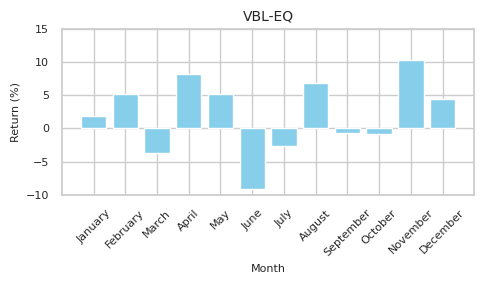

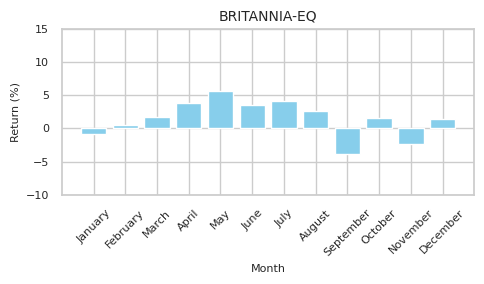

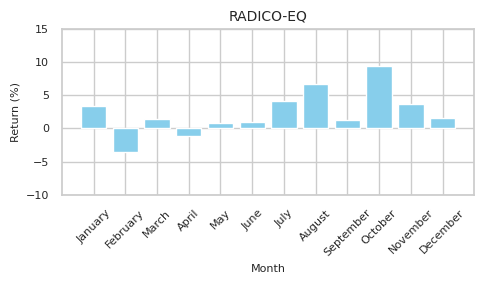

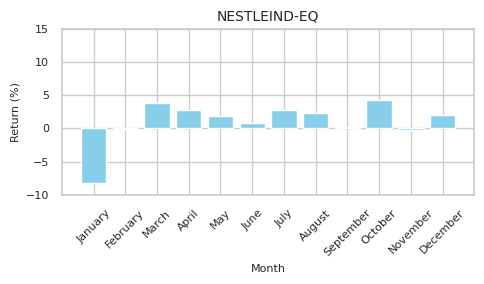

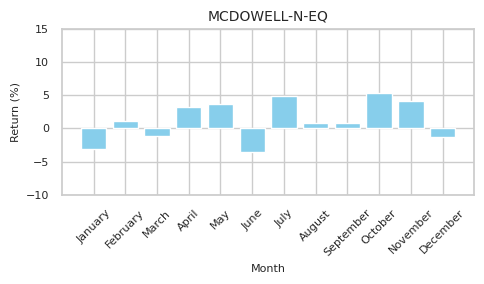

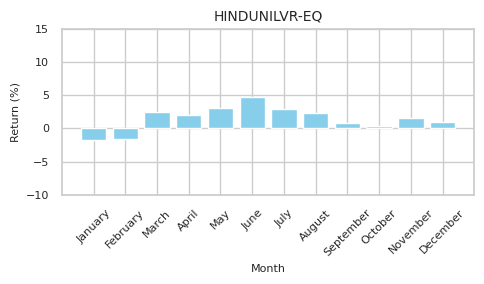

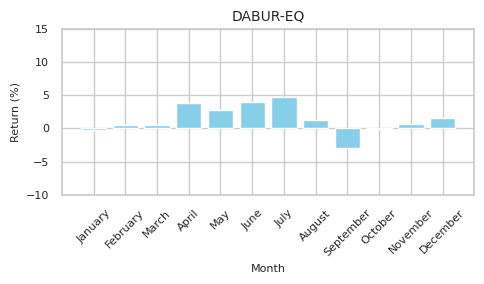

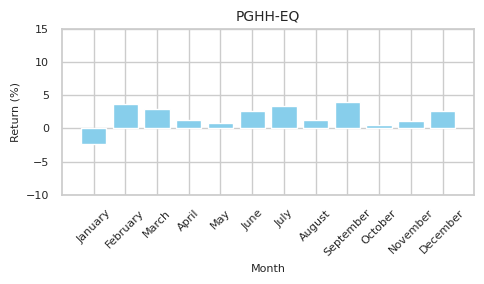

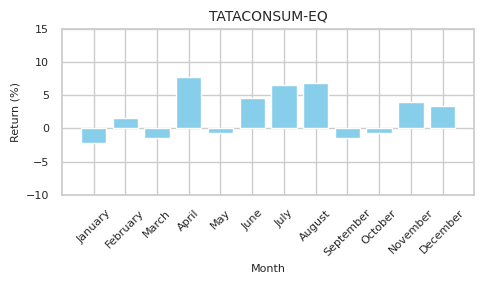

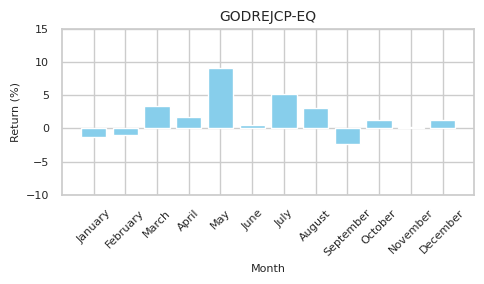

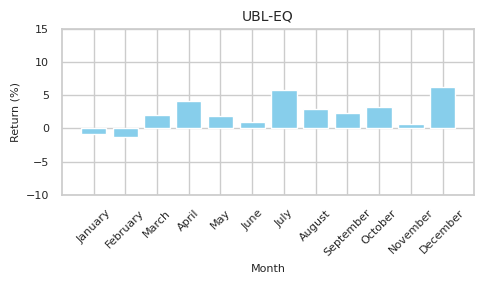

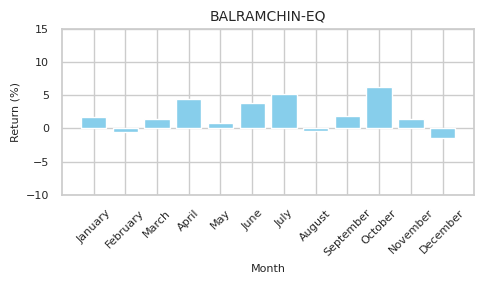

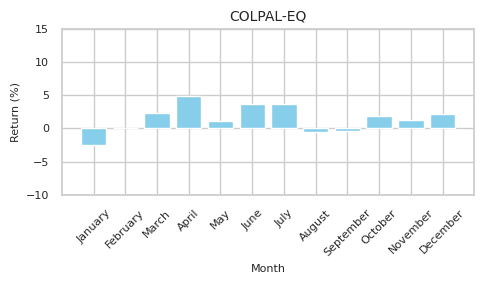

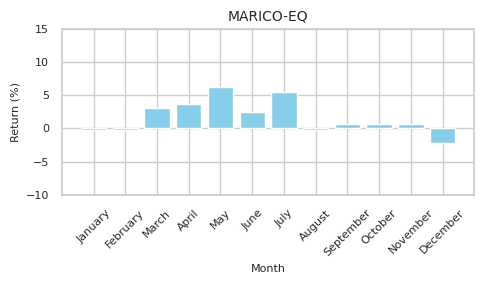

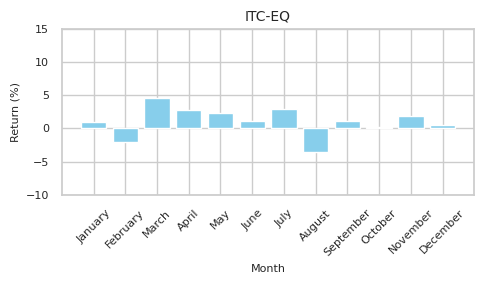

In [17]:
# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot each stock's returns individually in smaller, more compact figures
for i, stock in enumerate(df['Stock']):
    plt.figure(figsize=(5, 3))  # Reduce figure size for compactness
    plt.bar(df.columns[1:], df.loc[i, df.columns[1:]], color='skyblue')
    plt.title(stock, fontsize=10)  # Reduce font size of title
    plt.xlabel('Month', fontsize=8)  # Smaller axis labels
    plt.ylabel('Return (%)', fontsize=8)
    plt.xticks(rotation=45, fontsize=8)  # Smaller ticks
    plt.yticks(fontsize=8)
    plt.ylim(-10, 15)  # Adjust y-axis limits for better bar visibility
    plt.tight_layout()
    plt.show()